In [1]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [2]:

import pandas as pd
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

oht = OnehotTransactions()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print (df)

   Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False  


/ext/anaconda5/lib/python3.6/site-packages/mlxtend/preprocessing/onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


In [3]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print (frequent_itemsets)


    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Kidney Beans, Eggs)
6       0.6                (Eggs, Onion)
7       0.6         (Kidney Beans, Milk)
8       0.6        (Kidney Beans, Onion)
9       0.6       (Kidney Beans, Yogurt)
10      0.6  (Kidney Beans, Eggs, Onion)


In [4]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print (rules)
print(" ")

             antecedents            consequents  antecedent support  \
0                 (Eggs)                (Onion)                 0.8   
1                (Onion)                 (Eggs)                 0.6   
2   (Kidney Beans, Eggs)                (Onion)                 0.8   
3  (Kidney Beans, Onion)                 (Eggs)                 0.6   
4                 (Eggs)  (Kidney Beans, Onion)                 0.8   
5                (Onion)   (Kidney Beans, Eggs)                 0.6   

   consequent support  support  confidence  lift  leverage  conviction  
0                 0.6      0.6        0.75  1.25      0.12    1.600000  
1                 0.8      0.6        1.00  1.25      0.12         inf  
2                 0.6      0.6        0.75  1.25      0.12    1.600000  
3                 0.8      0.6        1.00  1.25      0.12         inf  
4                 0.6      0.6        0.75  1.25      0.12    1.600000  
5                 0.8      0.6        1.00  1.25      0.12      

In [5]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


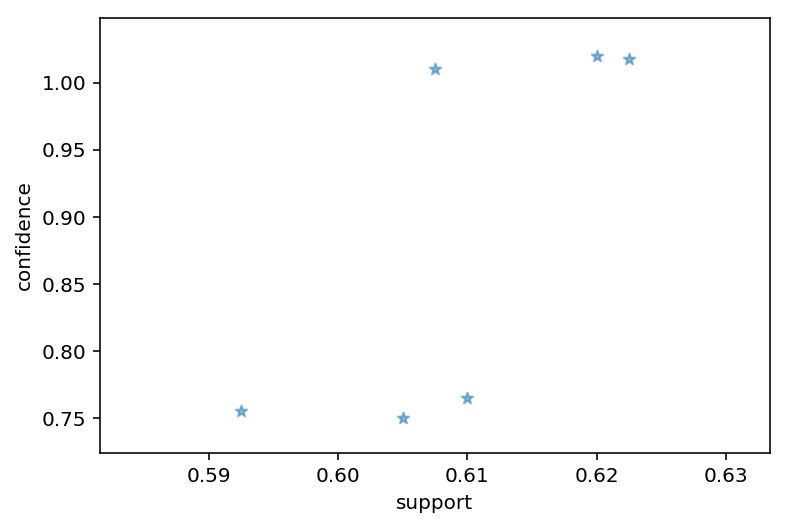

In [7]:
import random
import matplotlib.pyplot as plt
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5)
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()